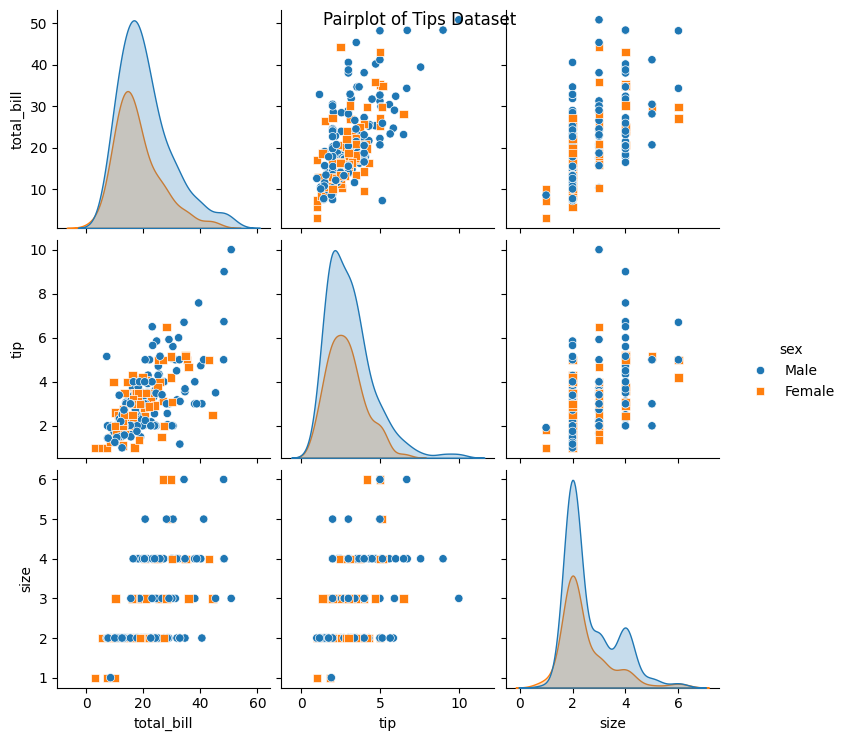

<ipython-input-20-9de34ae3aa02>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')


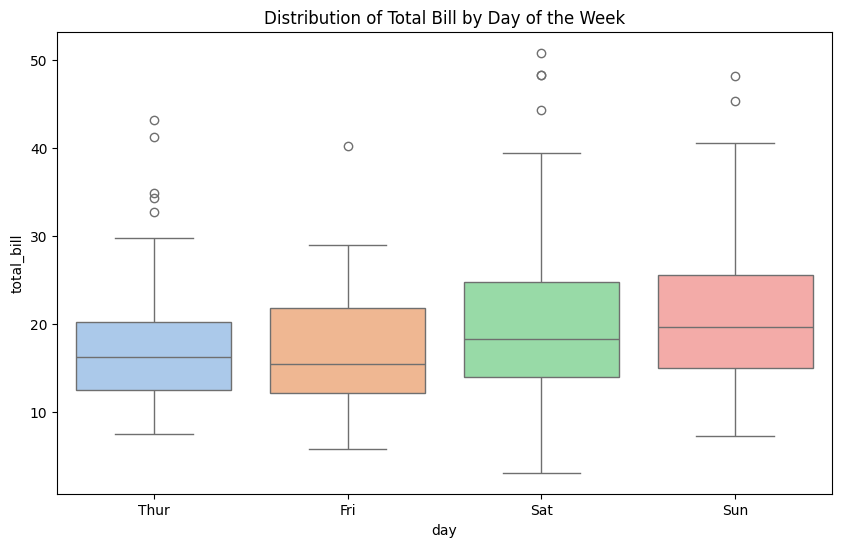

<ipython-input-20-9de34ae3aa02>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='tip', data=tips, palette='pastel')


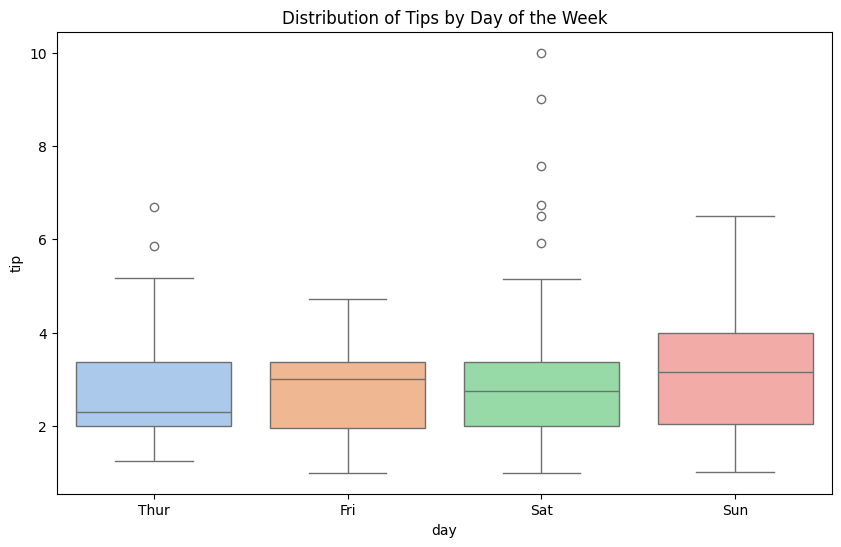

Best Model Parameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 0.5688142529229536


In [20]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
tips = sns.load_dataset('tips')

# EDA (Exploratory Data Analysis)
# Pairplot to visualize relationships between numerical variables
sns.pairplot(tips, hue='sex', markers=['o', 's'])
plt.suptitle('Pairplot of Tips Dataset')
plt.show()

# Boxplot to visualize distribution of total_bill and tip by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')
plt.title('Distribution of Total Bill by Day of the Week')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip', data=tips, palette='pastel')
plt.title('Distribution of Tips by Day of the Week')
plt.show()

# Feature engineering and preprocessing
# For this example, use 'total_bill' as X and 'tip' as y
X = tips[['total_bill']]
y = tips['tip']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LinearRegression()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'fit_intercept': [True, False],

    'copy_X': [True, False]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse}")


